<a href="https://colab.research.google.com/github/rahavi-r31/Comprehensive-Analysis-of-Earthquake-Patterns-and-Trends-in-India/blob/main/earthquakeanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install squarify

In [ ]:
## Import the relevant libraries into the environment

import numpy as np                ## linear algebra
import pandas as pd               ## data processing, dataset file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt   ## data visualization & graphical plotting
import seaborn as sns             ## to visualize random distributions
import plotly.express as px       ## data visualization & graphical plotting
import squarify                   ## Treemap plots

%matplotlib inline
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode

pd.options.display.float_format = '{:.2f}'.format  ## limiting the decimals in the output to 2

import warnings                    ## Filter warnings
warnings.filterwarnings('ignore')

In [ ]:
## Load the dataset

df = pd.read_csv('/content/Earthquake.csv')

## Check a few records in the dataset that we just loaded

df.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2009-12-31T09:57:29.720Z,27.32,91.51,10.00,5.50,mb,205.00,37.40,NaN,0.89,...,2017-04-26T18:09:55.932Z,Bhutan,earthquake,NaN,NaN,NaN,118.00,reviewed,us,us
1,2009-12-29T13:33:22.870Z,35.02,73.00,63.80,4.00,mb,40.00,95.80,NaN,0.94,...,2014-11-07T01:40:19.294Z,northwestern Kashmir,earthquake,NaN,8.60,NaN,7.00,reviewed,us,us
2,2009-12-29T09:01:55.310Z,24.36,94.81,124.80,5.60,mwb,206.00,17.30,NaN,0.77,...,2016-11-10T02:22:03.905Z,Myanmar-India border region,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
3,2009-12-28T02:15:04.870Z,30.69,83.77,10.00,4.40,mb,50.00,40.60,NaN,1.08,...,2014-11-07T01:40:19.031Z,western Xizang,earthquake,NaN,NaN,NaN,9.00,reviewed,us,us
4,2009-12-26T00:23:38.570Z,14.00,92.86,42.60,5.00,mb,117.00,68.10,NaN,0.82,...,2014-11-07T01:40:18.641Z,"Andaman Islands, India region",earthquake,NaN,5.70,NaN,56.00,reviewed,us,us


In [ ]:
## Check the dataset shape, rows, columns, duplicate entries & missing values

print(f'\033[94mNumber of records (rows) in the dataset are: {df.shape[0]}')
print(f'\033[94mNumber of features (columns) in the dataset are: {df.shape[1]}')
print(f'\033[94mNumber of duplicate entries in the dataset are: {df.duplicated().sum()}')
print(f'\033[94mNumber missing values in the dataset are: {sum(df.isna().sum())}')

Number of records (rows) in the dataset are: 14698
Number of features (columns) in the dataset are: 22
Number of duplicate entries in the dataset are: 0
Number missing values in the dataset are: 50639


There are no duplicate entries in the dataset.
However, there are around 50639 missing values in the dataset.

In [ ]:
## Let's find out which features have null values

df.isnull().sum()[df.isnull().sum() > 0]

nst                 2857
gap                 1720
dmin               12004
rms                    7
horizontalError    12625
depthError          7943
magError           12051
magNst              1432
dtype: int64


We'll try to find a solution for missing values in later stages of the notebook.

In [ ]:
## Have a glance at the dataframe with info() and describe() functions

print('--'*40)
print(df.info())
print('--'*40, '\n', df.describe(include='all').T)
print('--'*40)

--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14698 entries, 0 to 14697
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             14698 non-null  object 
 1   latitude         14698 non-null  float64
 2   longitude        14698 non-null  float64
 3   depth            14698 non-null  float64
 4   mag              14698 non-null  float64
 5   magType          14698 non-null  object 
 6   nst              11841 non-null  float64
 7   gap              12978 non-null  float64
 8   dmin             2694 non-null   float64
 9   rms              14691 non-null  float64
 10  net              14698 non-null  object 
 11  id               14698 non-null  object 
 12  updated          14698 non-null  object 
 13  place            14698 non-null  object 
 14  type             14698 non-null  object 
 15  horizontalError  2073 n

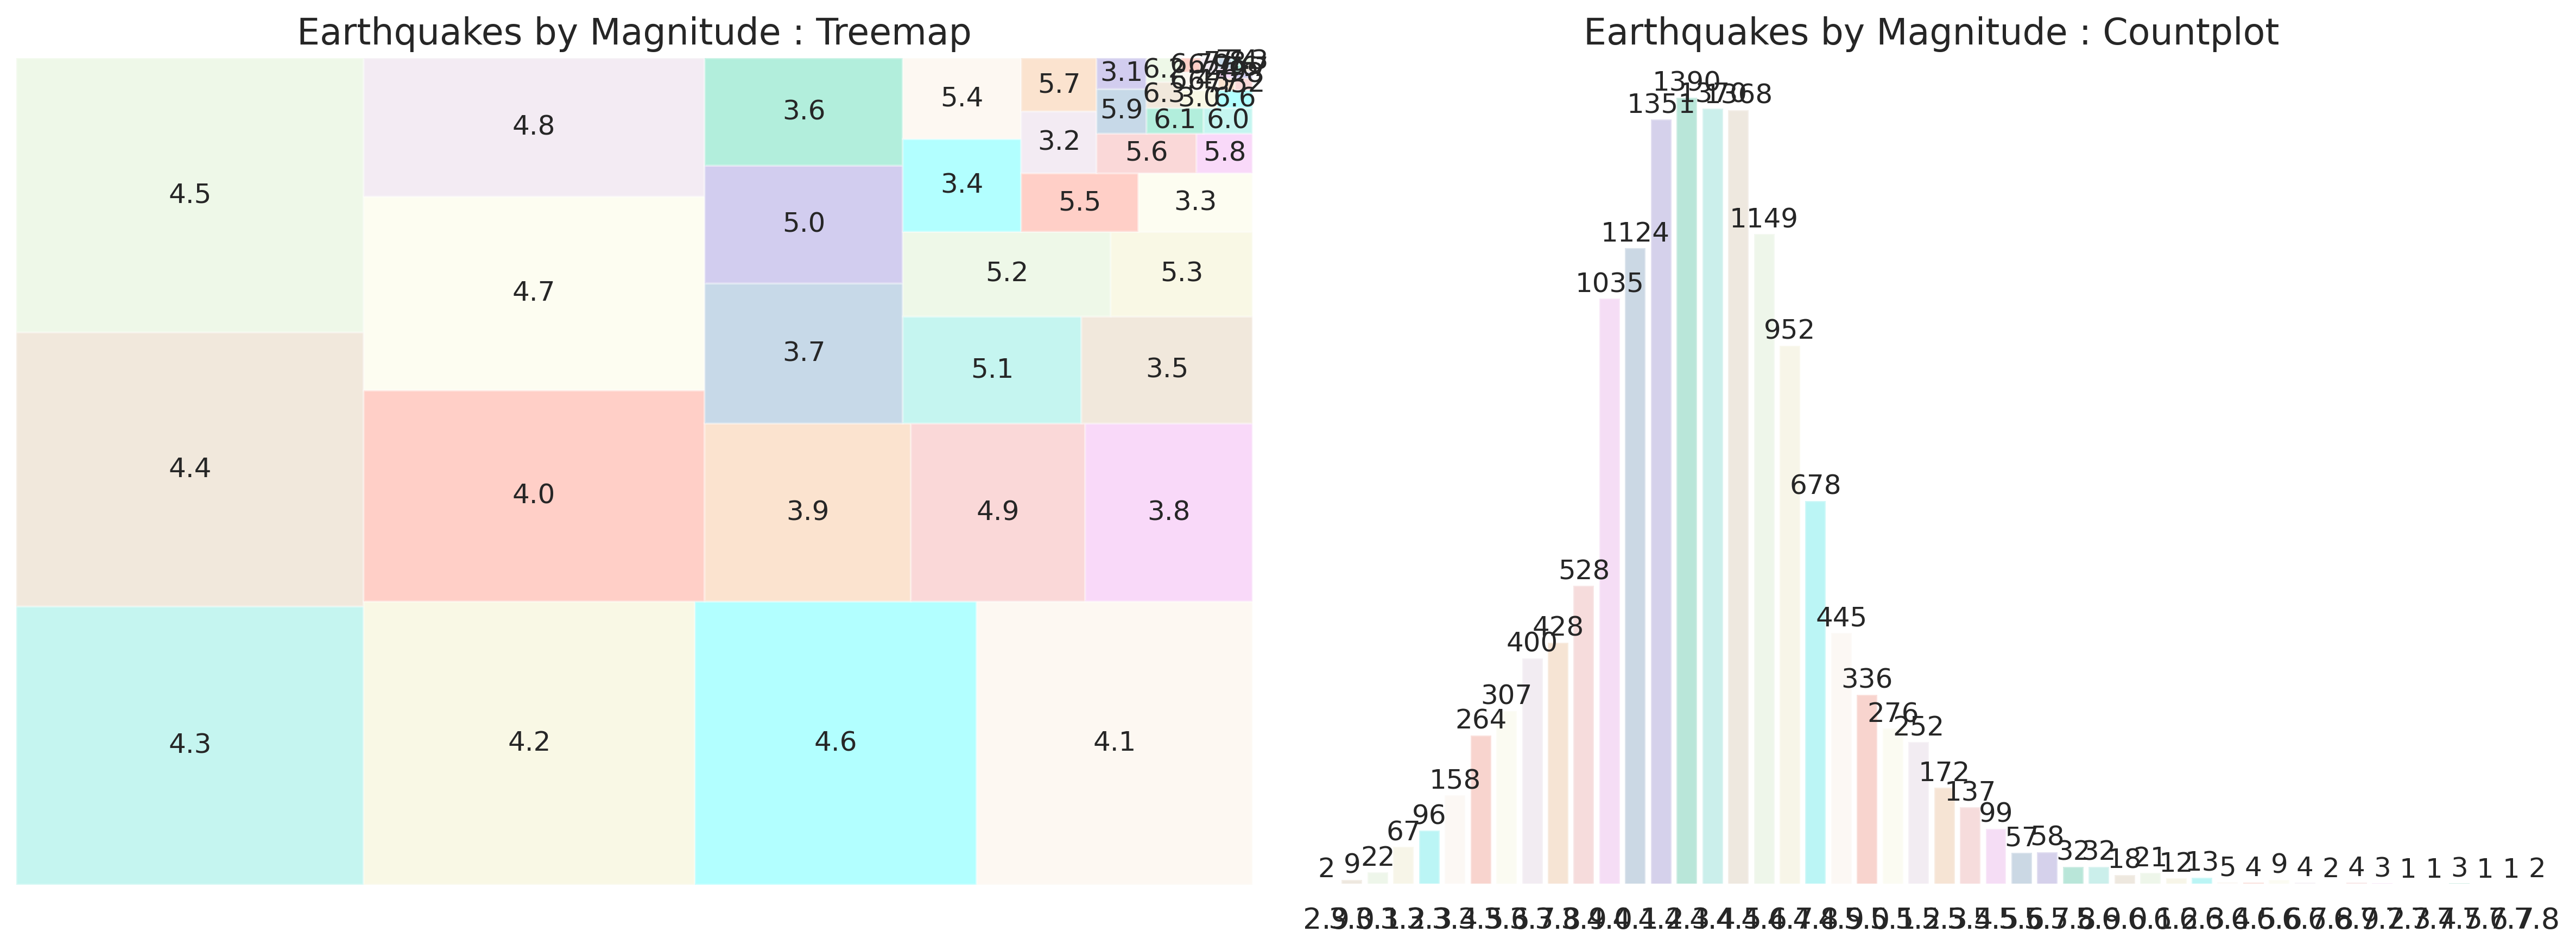

In [ ]:
## Let's visualise the Earthquakes by Magnitude, to understand it in a better way
sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':13,'ytick.labelsize':13, 'figure.autolayout':True, 'figure.dpi':300, 'savefig.dpi':300})
my_col = ('#40E0D0', '#D2B48C','#c7e9b4', '#EEE8AA','#00FFFF','#FAEBD7','#FF6347', '#FAFAD2', '#D8BFD8','#F4A460','#F08080', '#EE82EE', '#4682B4','#6A5ACD', '#00C78C')

plt.subplots(figsize=(16,6))

plt.subplot(1,2,1)

plt.title('Earthquakes by Magnitude : Treemap',fontsize=16)
labels = df['mag'].value_counts().index.get_level_values(0).tolist()
sizes = df['mag'].value_counts().reset_index().mag.values.tolist()

squarify.plot(sizes=sizes, label=labels, color=my_col, alpha=0.3)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Earthquakes by Magnitude : Countplot', fontsize=16)
ax = sns.countplot(x='mag', data=df, palette=my_col, alpha=0.3)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+ p.get_width()/2, p.get_height() + 2), ha='center', va='bottom')
plt.ylabel(None), plt.yticks([]), plt.xlabel(None)

plt.show()

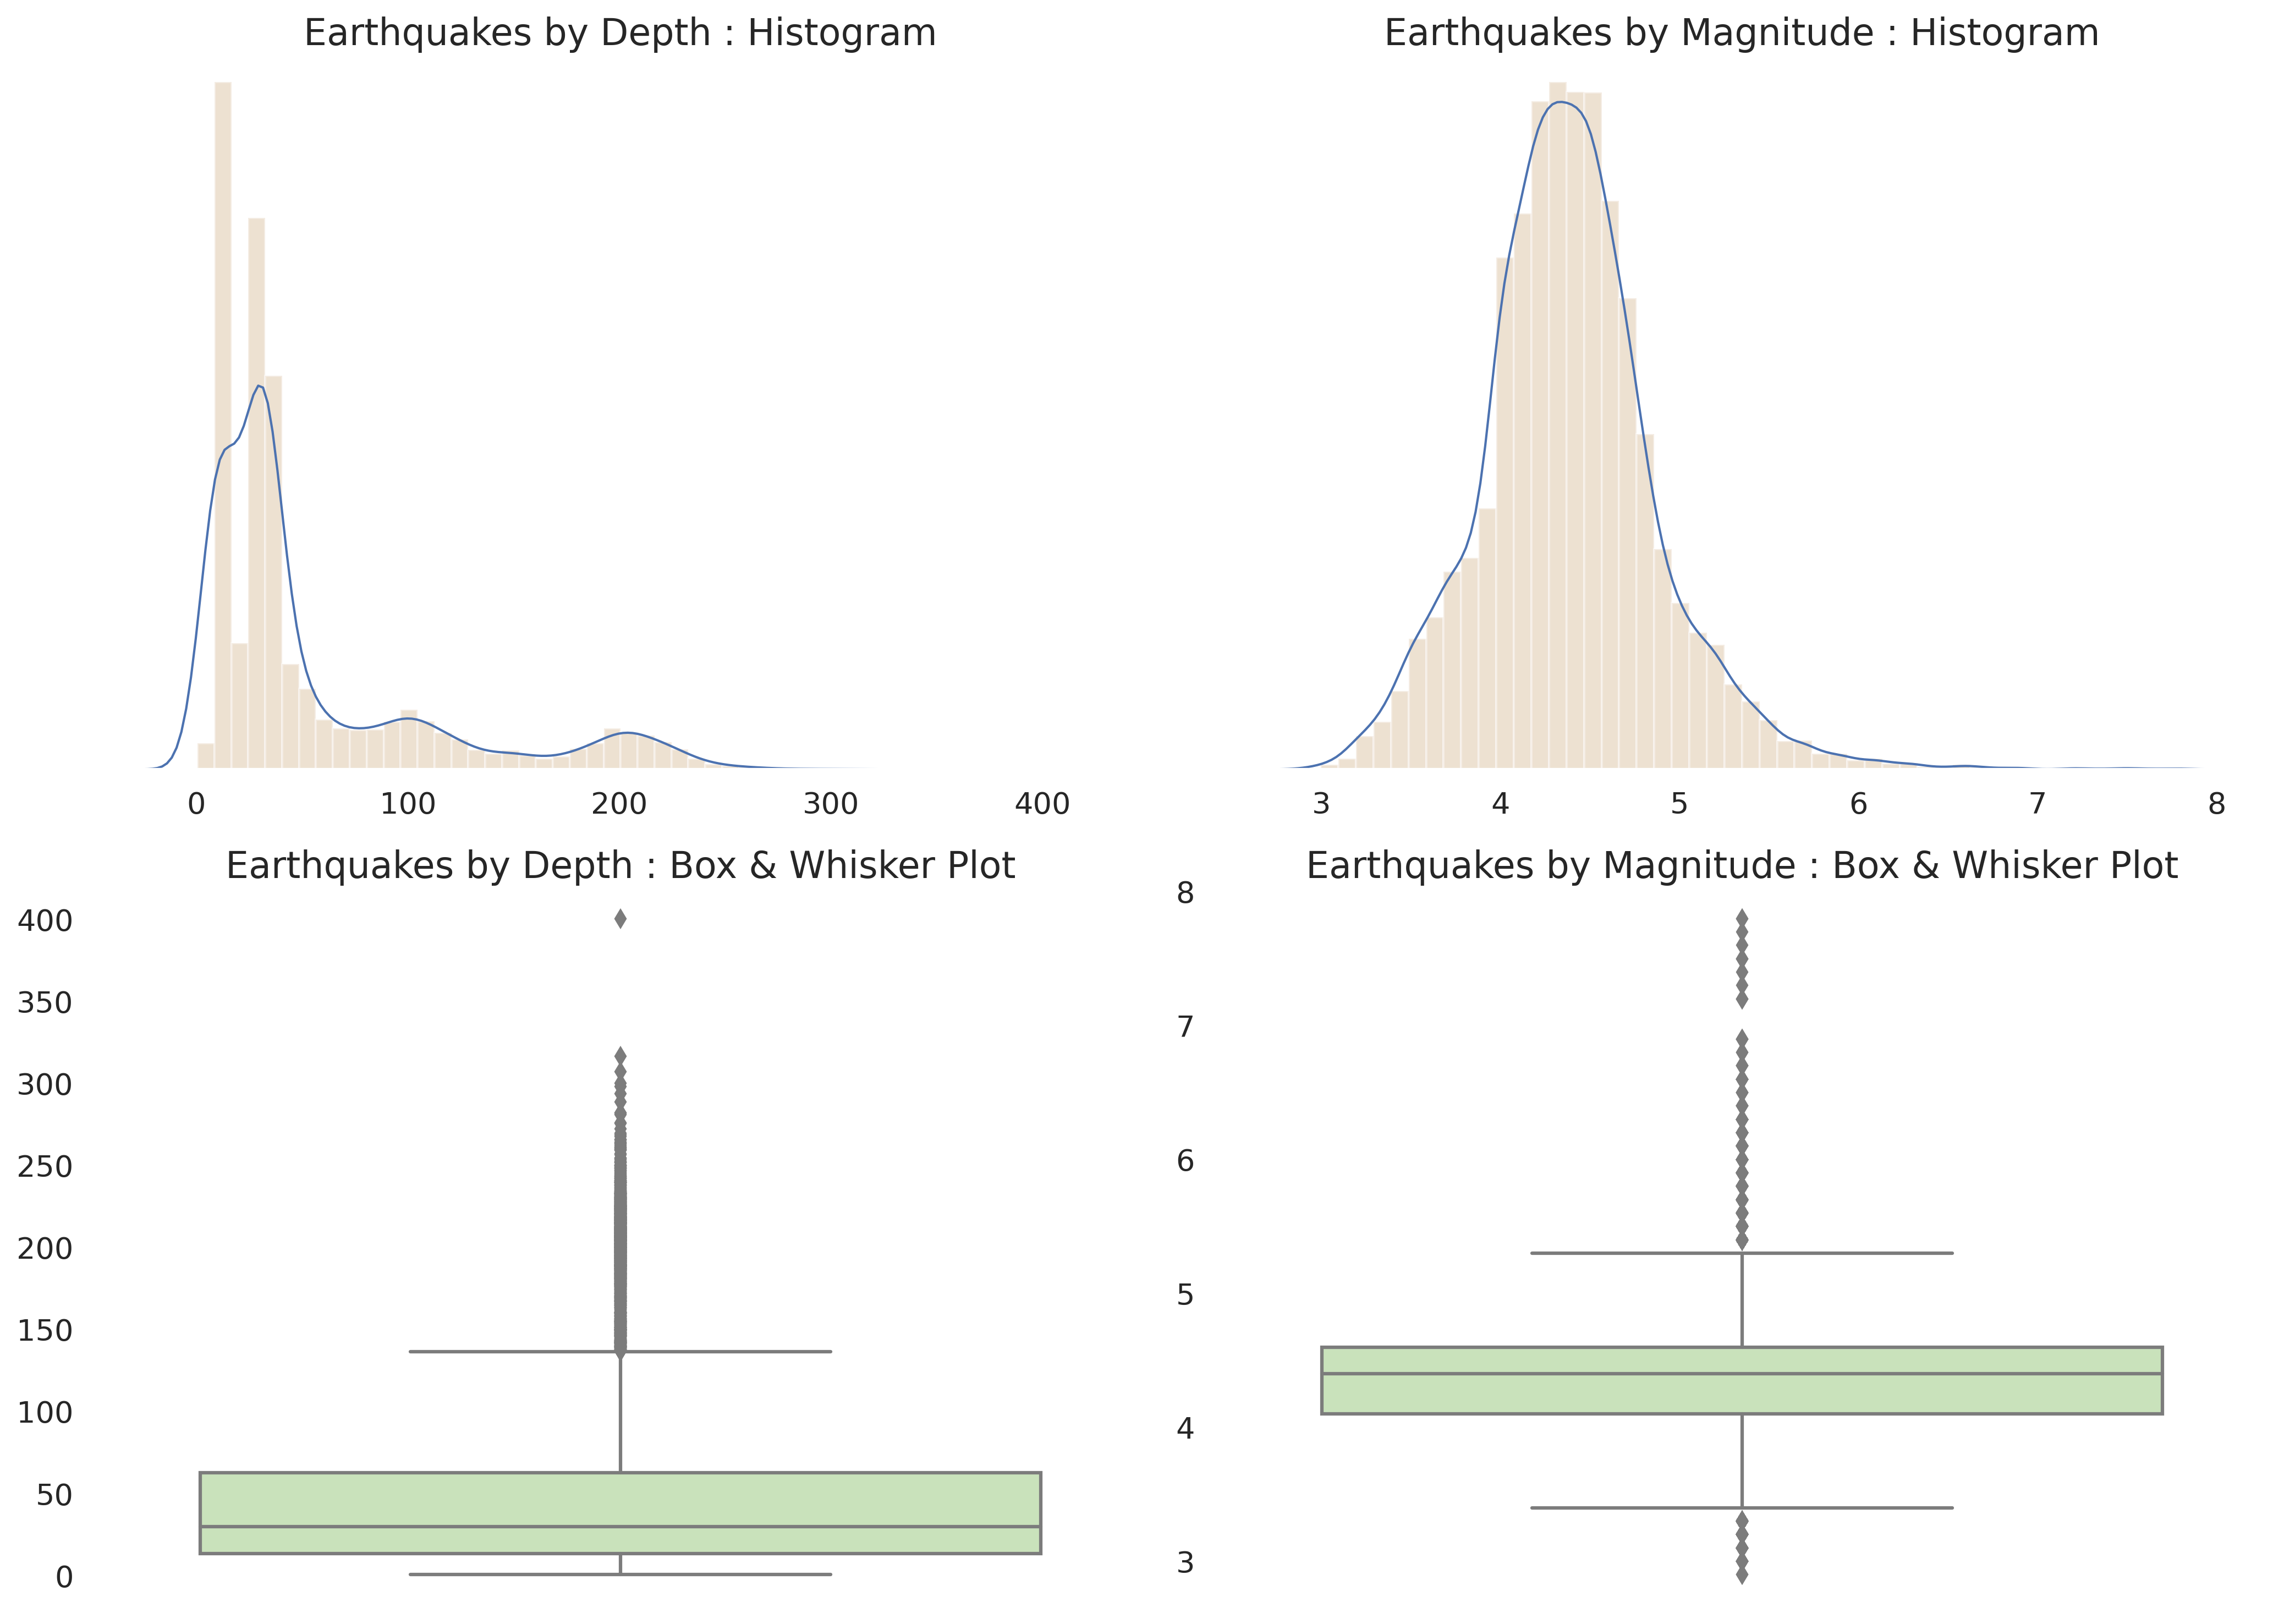

In [ ]:
## We'll use histograms and box & whisker plots to identify the trend

plt.subplots(figsize=(14,10))

plt.subplot(2,2,1)
plt.title('Earthquakes by Depth : Histogram', pad=1, fontsize=16)
sns.distplot(df['depth'], color="#D2B48C", kde_kws={'linewidth':1,'color':'b'})
plt.yticks([]), plt.ylabel(None), plt.xlabel(None)

plt.subplot(2,2,2)
plt.title('Earthquakes by Magnitude : Histogram', pad=1, fontsize=16)
sns.distplot(df['mag'], color="#D2B48C", kde_kws={'linewidth':1,'color':'b'})
plt.yticks([]), plt.ylabel(None), plt.xlabel(None)

plt.subplot(2,2,3)
plt.title('Earthquakes by Depth : Box & Whisker Plot', pad=1, fontsize=16)
sns.boxplot(df['depth'], color="#c7e9b4", orient='v')
plt.ylabel(None), plt.xlabel(None), plt.xticks([])

plt.subplot(2,2,4)
plt.title('Earthquakes by Magnitude : Box & Whisker Plot', pad=1, fontsize=16)
sns.boxplot(df['mag'], color="#c7e9b4", orient='v')
plt.ylabel(None), plt.xlabel(None), plt.xticks([])

plt.show()

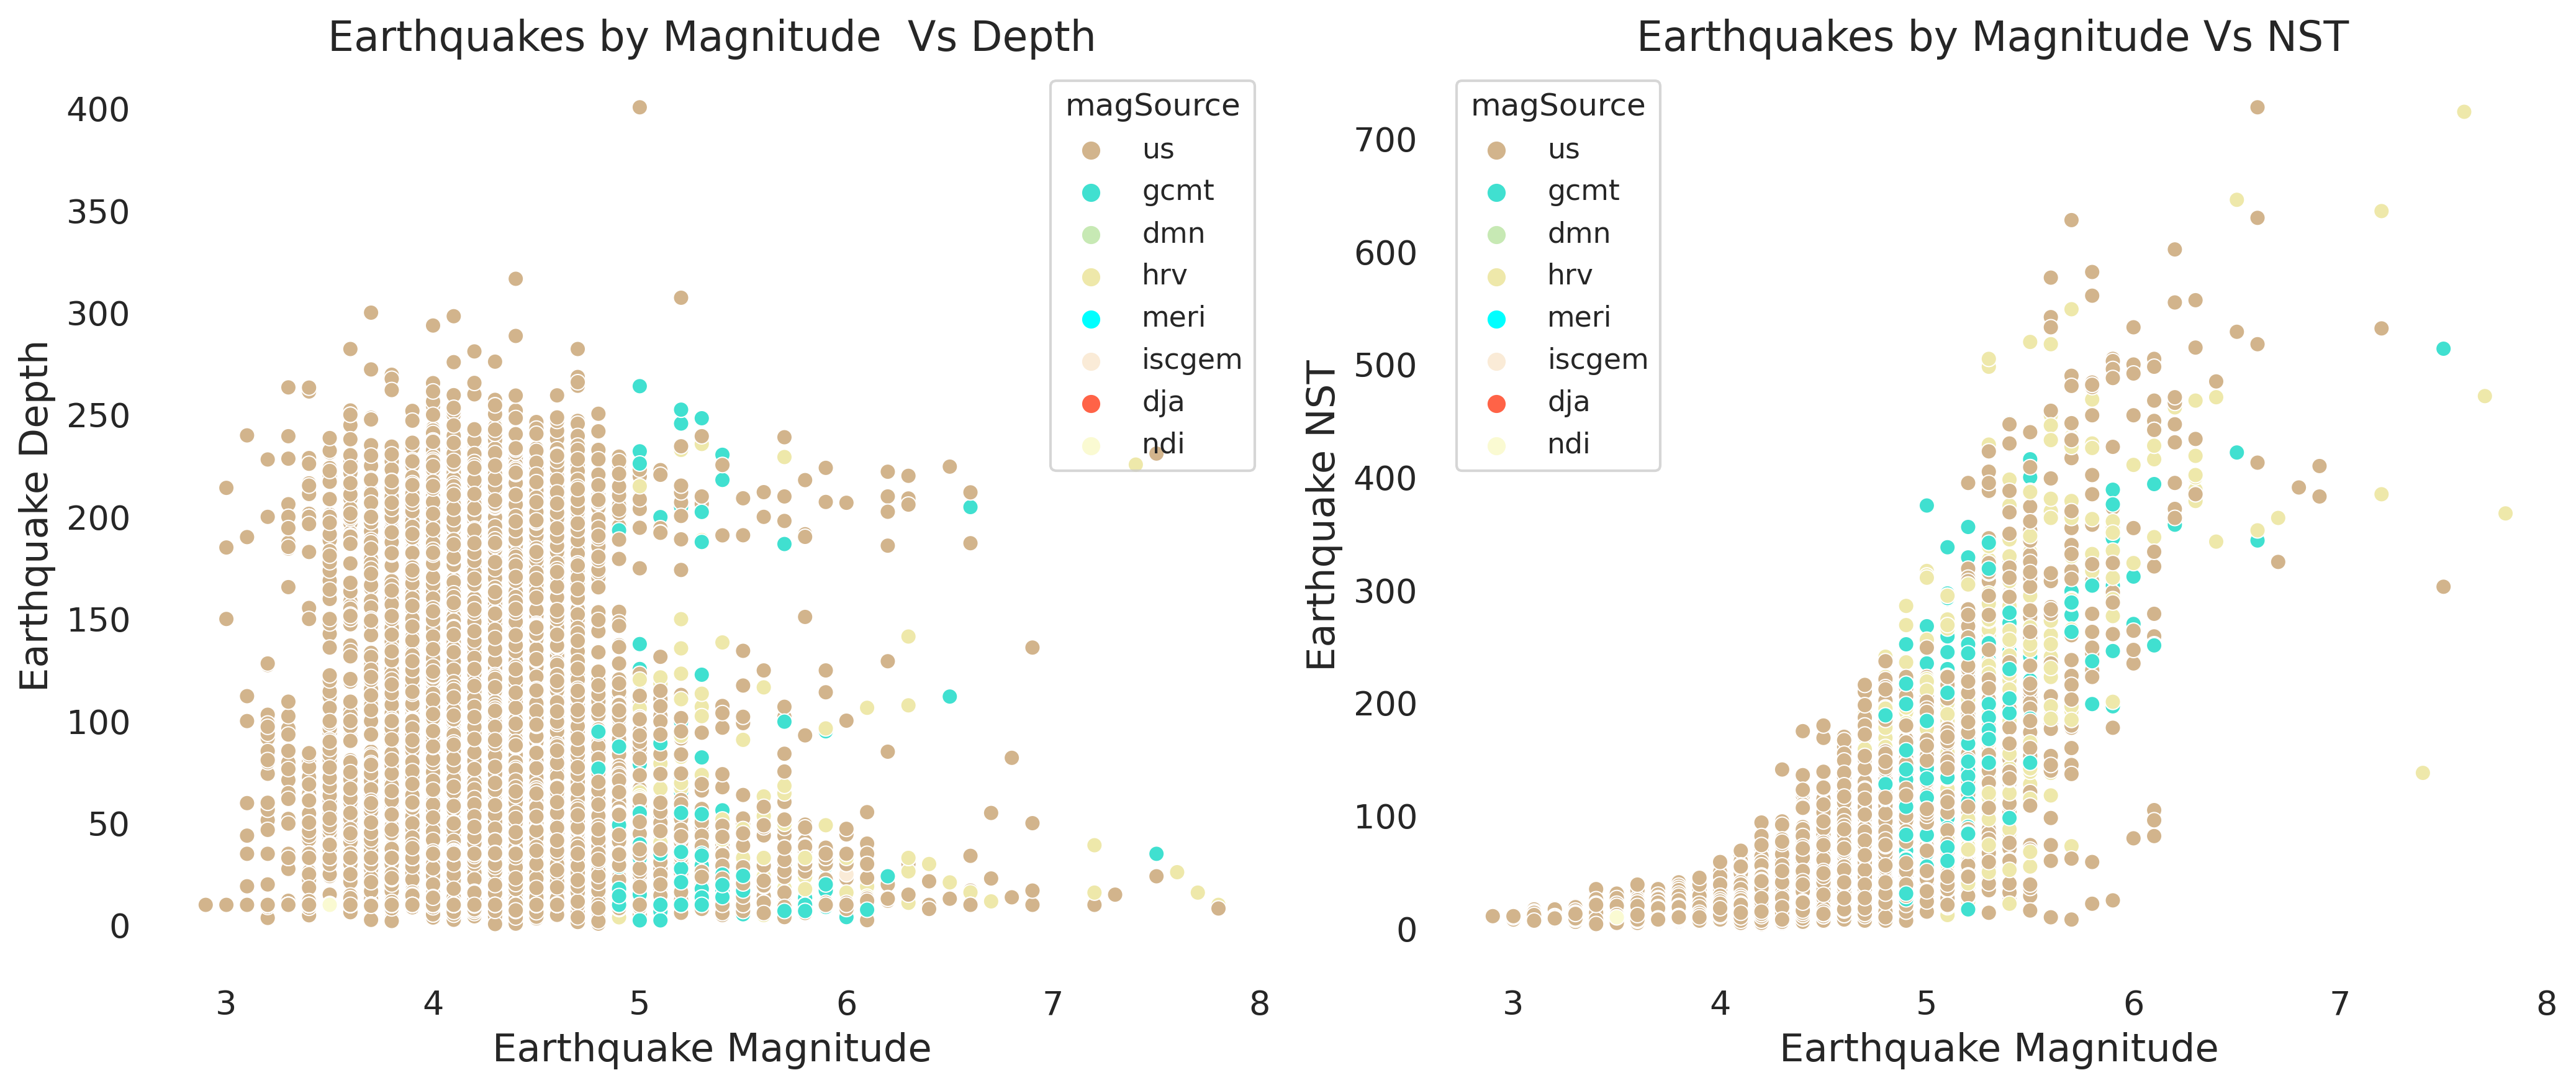

In [ ]:
## Let's understand the relationship between magnitude vs depth and
## magnitude vs nst (number of reporting seismic stations contributing to the earthquake's magnitude calculation.)

plt.subplots(figsize=(14,6))
my_pal = ['#D2B48C','#40E0D0','#c7e9b4', '#EEE8AA','#00FFFF','#FAEBD7','#FF6347', '#FAFAD2', '#D8BFD8','#F4A460','#F08080', '#EE82EE', '#4682B4','#6A5ACD', '#00C78C']

plt.subplot(1,2,1)
plt.title('Earthquakes by Magnitude  Vs Depth',fontsize=16)
sns.scatterplot(data=df, x='mag', y='depth', hue='magSource', palette=my_pal)
plt.ylabel('Earthquake Depth', fontsize=15)
plt.xlabel('Earthquake Magnitude', fontsize=15)

plt.subplot(1,2,2)
plt.title('Earthquakes by Magnitude Vs NST ',fontsize=16)
sns.scatterplot(data=df, x='mag', y='nst', hue='magSource', palette=my_pal)
plt.ylabel('Earthquake NST', fontsize=15)
plt.xlabel('Earthquake Magnitude', fontsize=15)

plt.show()

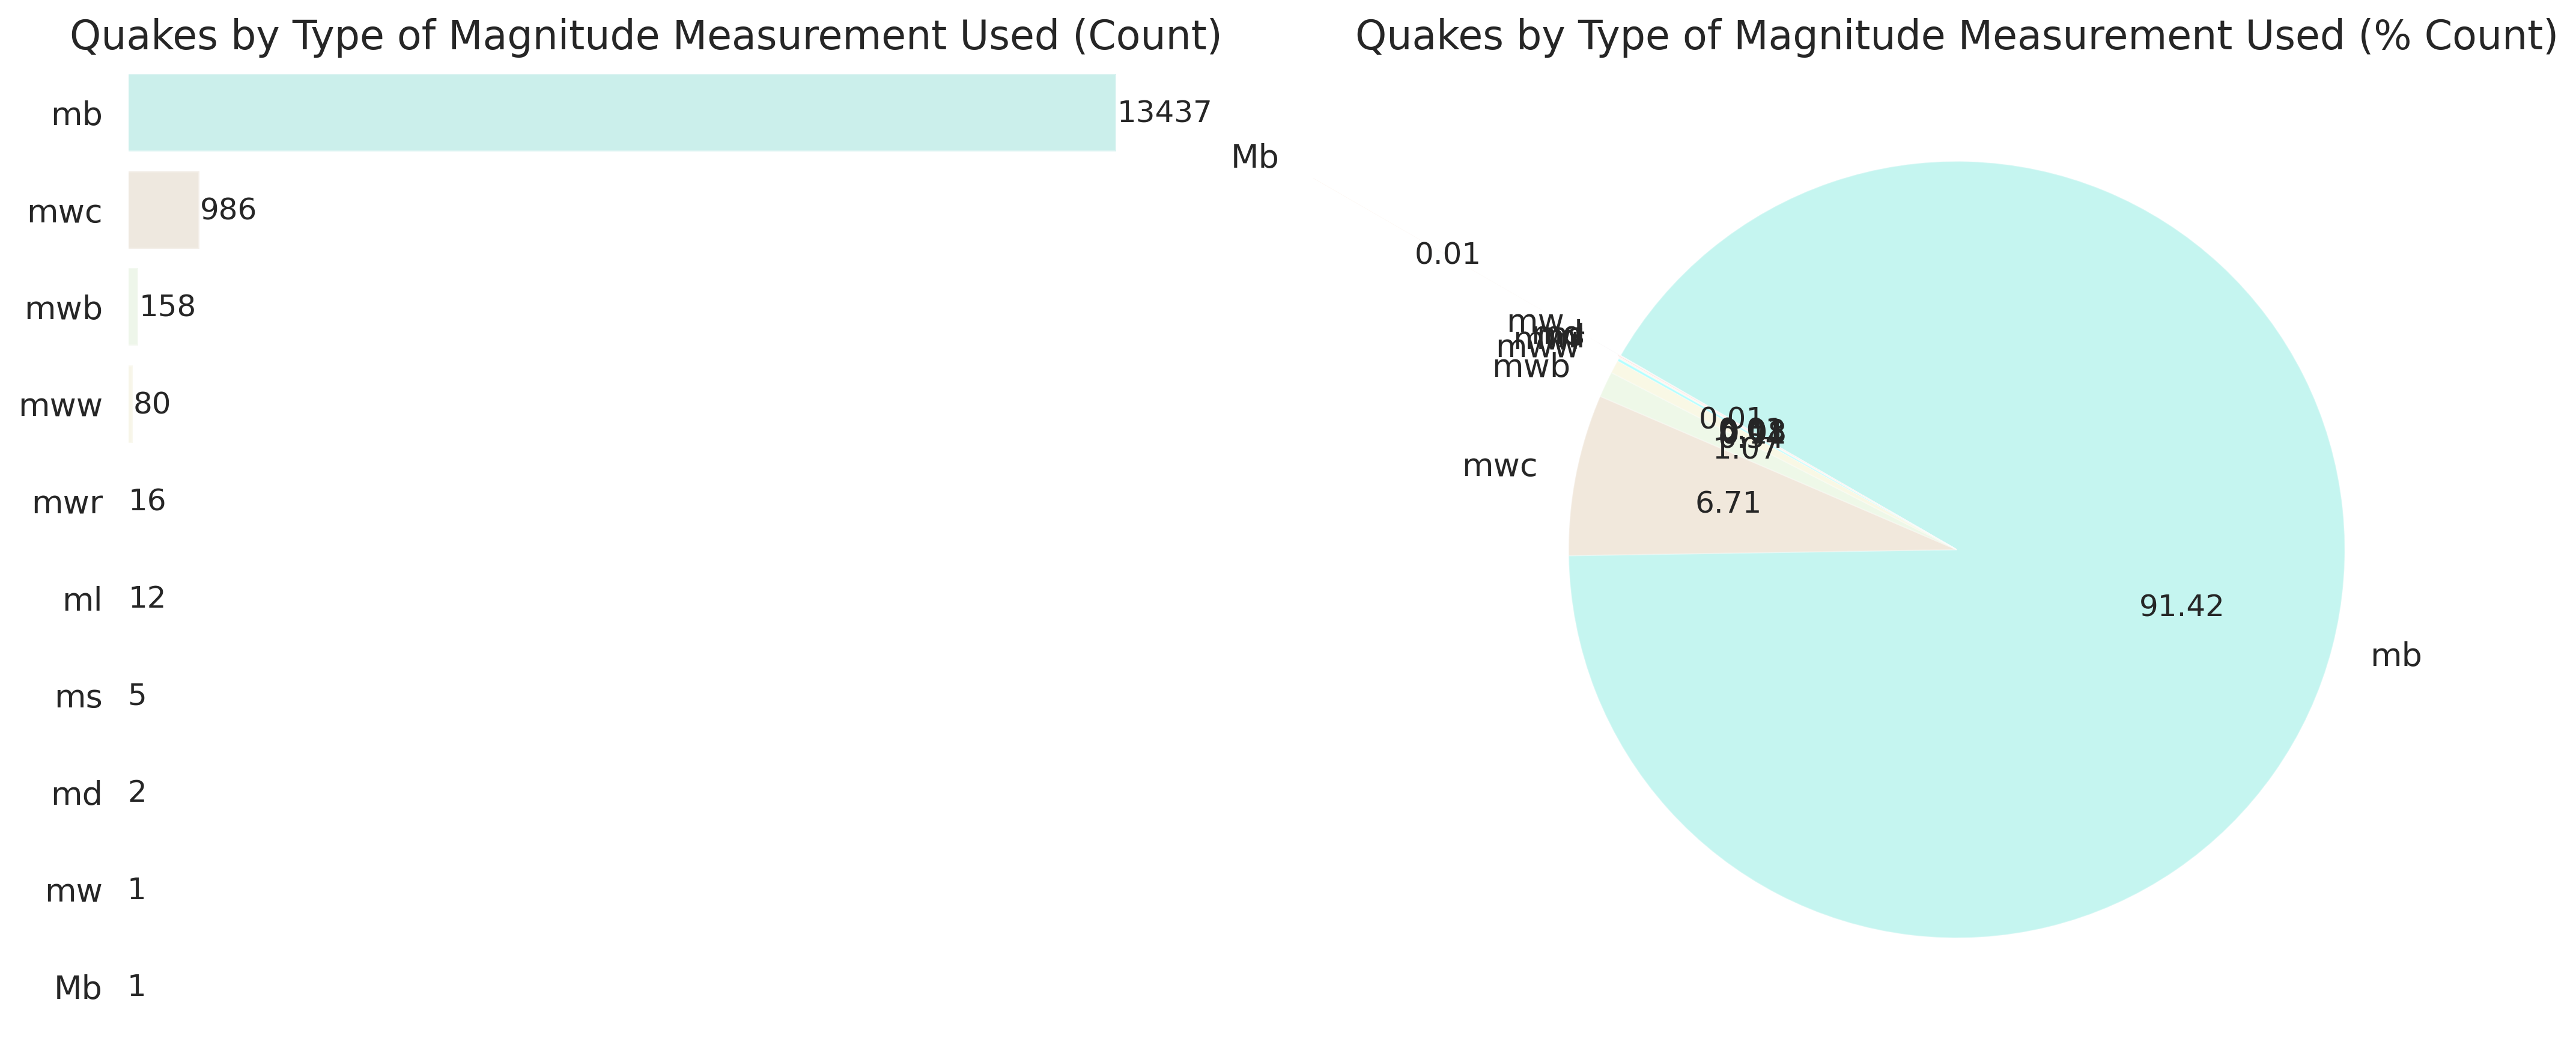

In [ ]:
## Let's visualise earthquakes by type of magnitude measurement used

plt.subplots(figsize=(14,6))

plt.subplot(1,2,1)
plt.title('Quakes by Type of Magnitude Measurement Used (Count)', fontsize=16)
ax = sns.countplot(y='magType', data=df, palette=my_col, alpha=0.3, order=df['magType'].value_counts().index)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_width()),  (p.get_x() + p.get_width() + 10, p.get_y()+0.5))
plt.ylabel(None), plt.xlabel(None), plt.xticks([])

plt.subplot(1,2,2)
plt.title('Quakes by Type of Magnitude Measurement Used (% Count)',fontsize=16)
my_xpl = [0.0,0.0, 0.0, 0.0, 0.0, 0.00108, 0.00544, 0.01074, 0.06708, 0.91420]
df['magType'].value_counts().plot(kind='pie', colors=my_col, explode=my_xpl, legend=None, ylabel='', counterclock=False, startangle=150, wedgeprops={'alpha':0.3, 'edgecolor' : 'white','linewidth': 0.5, 'antialiased': True}, autopct='%1.2f')

plt.show()

In [ ]:
## Analyse the data by Year, Month, Day of the month, and Hour of the day.

## Make a new Date, Year, Month, Day, & Hour columns from the 'date_time' column for our analysis
print(df['time'].dtype)
df['Date'] = pd.to_datetime(df['time']).dt.date
df['Year'] = pd.to_datetime(df['time']).dt.year
df['Month'] = pd.to_datetime(df['time']).dt.month
df['Day'] = pd.to_datetime(df['time']).dt.day
df['Hour'] = pd.to_datetime(df['time']).dt.hour

## Check the new columns we have created in our dataset

df[['time', 'Date', 'Year', 'Month', 'Day', 'Hour']].head(5)

object


,time,Date,Year,Month,Day,Hour
0,2009-12-31T09:57:29.720Z,2009-12-31,2009,12,31,9
1,2009-12-29T13:33:22.870Z,2009-12-29,2009,12,29,13
2,2009-12-29T09:01:55.310Z,2009-12-29,2009,12,29,9
3,2009-12-28T02:15:04.870Z,2009-12-28,2009,12,28,2
4,2009-12-26T00:23:38.570Z,2009-12-26,2009,12,26,0


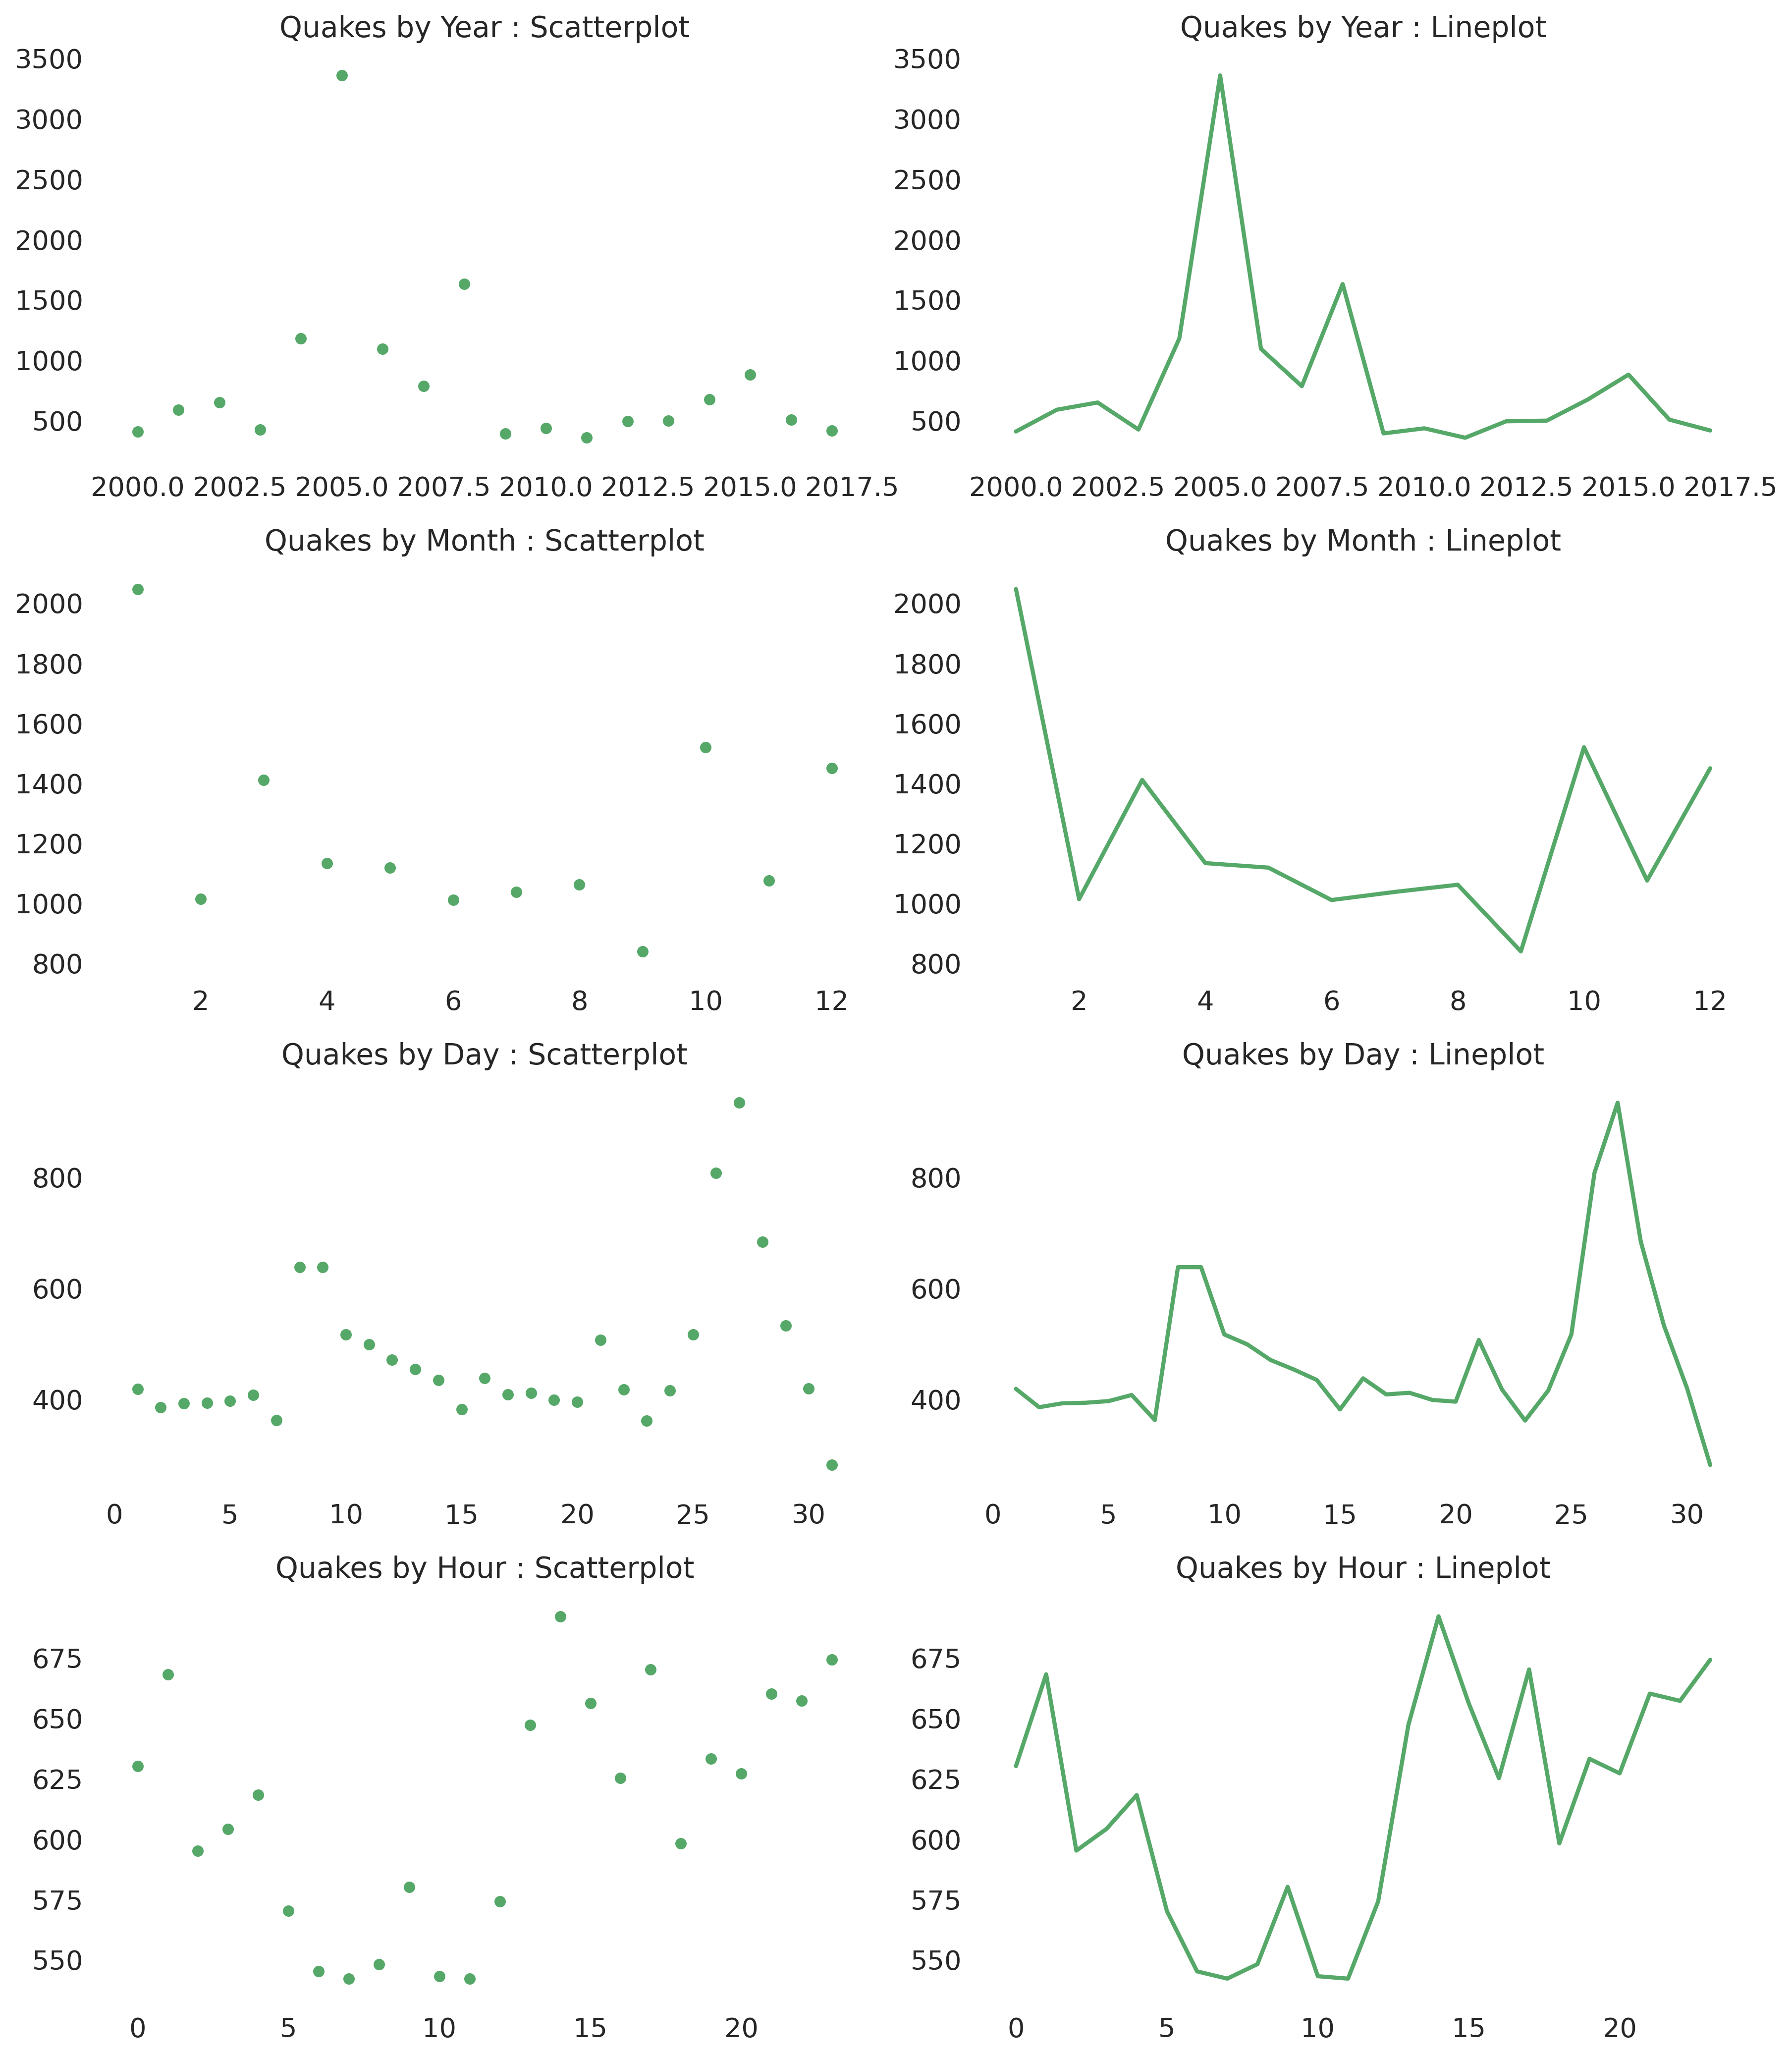

In [ ]:
## Now, let's visualise the earthquake events by Year, Month, Day, and Hour with Scatterplots & Lineplots

plt.subplots(figsize=(12,14))

## By Year
###########

plt.subplot(421)
plt.title('Quakes by Year : Scatterplot', pad = 10, fontsize = 14)
sns.scatterplot(data = df['Year'].value_counts().sort_values(), color='g')
plt.ylabel(None), plt.xlabel(None)

plt.subplot(422)
plt.title('Quakes by Year : Lineplot', pad = 10, fontsize = 14)
sns.lineplot(data = df['Year'].value_counts().sort_values(), color='g', linewidth = 2)
plt.ylabel(None), plt.xlabel(None)

## By Month
###########

plt.subplot(423)
plt.title('Quakes by Month : Scatterplot', pad = 10, fontsize = 14)
sns.scatterplot(data = df['Month'].value_counts().sort_values(), color='g')
plt.ylabel(None), plt.xlabel(None)

plt.subplot(424)
plt.title('Quakes by Month : Lineplot', pad = 10, fontsize = 14)
sns.lineplot(data = df['Month'].value_counts().sort_values(), color='g', linewidth = 2)
plt.ylabel(None), plt.xlabel(None)

## By Day
###########

plt.subplot(425)
plt.title('Quakes by Day : Scatterplot', pad = 10, fontsize = 14)
sns.scatterplot(data = df['Day'].value_counts().sort_values(), color='g')
plt.ylabel(None), plt.xlabel(None)

plt.subplot(426)
plt.title('Quakes by Day : Lineplot', pad = 10, fontsize = 14)
sns.lineplot(data = df['Day'].value_counts().sort_values(), color='g', linewidth = 2)
plt.ylabel(None), plt.xlabel(None)

## By Hour
###########

plt.subplot(427)
plt.title('Quakes by Hour : Scatterplot', pad = 10, fontsize = 14)
sns.scatterplot(data = df['Hour'].value_counts().sort_values(), color='g')
plt.ylabel(None), plt.xlabel(None)

plt.subplot(428)
plt.title('Quakes by Hour : Lineplot', pad = 10, fontsize = 14)
sns.lineplot(data = df['Hour'].value_counts().sort_values(), color='g', linewidth = 2)
plt.ylabel(None), plt.xlabel(None)

plt.show()